In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Salary Prediction.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
x=df["YearsExperience"]
#on extracting one column from dataframe we get a series and it needs to be converted to an array to work with
x=np.array(x)
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [7]:
y=df["Salary"]
#on extracting one column from dataframe we get a series and it needs to be converted to an array to work with
y=np.array(y)
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

Text(0, 0.5, 'Salary')

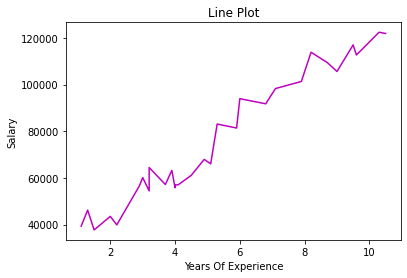

In [8]:
#drawing a line plot
plt.plot(x,y,c="m")
plt.title("Line Plot")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

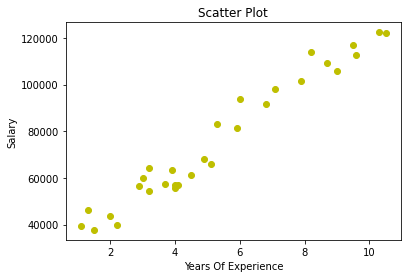

In [9]:
#drawing scatter plot
plt.scatter(x,y,c="y")
plt.title("Scatter Plot")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")

In [25]:
#splitting the dataset to train & test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
#converting the 1d array to 2d array or else later fit function gives error
#we have extracted 1 column which is series
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

**Applying Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
model_lir=LinearRegression()
model_lir.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_preds_lir=model_lir.predict(x_test)
y_preds_lir

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

Text(0, 0.5, 'Salary')

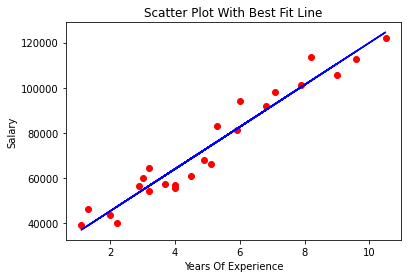

In [32]:
#plotting scatter plot with best fit line
plt.scatter(x_train,y_train,c="r")
#to get the best fit line we used x_train vs value predicted for x_train
plt.plot(x_train,model_lir.predict(x_train),c="b")
plt.title("Scatter Plot With Best Fit Line")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")

In [34]:
#printing the accuracy of the model 
acc_lir=model_lir.score(x_test,y_test)
acc_lir

0.988169515729126

**Applying K-Nearest Neighbors Regressor**

In [16]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor(n_neighbors=3)
model_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [37]:
y_preds_knn=model_knn.predict(x_test)
y_preds_knn

array([[ 43024.33333333],
       [113363.        ],
       [ 56646.66666667],
       [ 56646.66666667],
       [113363.        ],
       [106898.66666667]])

Text(0, 0.5, 'Salary')

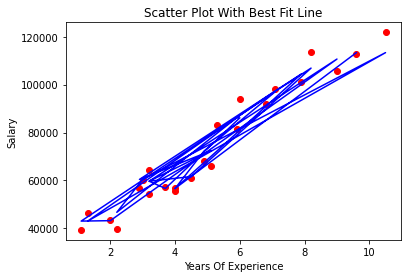

In [40]:
#plotting scatter plot with best fit line
plt.scatter(x_train,y_train,c="r")
#to get the best fit line we used x_train vs value predicted for x_train
plt.plot(x_train,model_knn.predict(x_train),c="b")
plt.title("Scatter Plot With Best Fit Line")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")

In [18]:
acc_knn=model_knn.score(x_test,y_test)
acc_knn

0.9735051713340684

**Applying Lasso Regression**

In [44]:
from sklearn.linear_model import LassoLarsCV
model_lar=LassoLarsCV(cv=10,precompute=False)
model_lar.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoLarsCV(copy_X=True, cv=10, eps=2.220446049250313e-16, fit_intercept=True,
            max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
            positive=False, precompute=False, verbose=False)

In [45]:
y_preds_lar=model_lar.predict(x_test)
y_preds_lar

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

Text(0, 0.5, 'Salary')

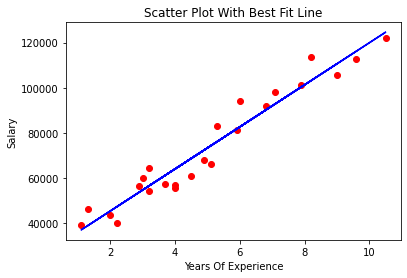

In [46]:
#plotting scatter plot with best fit line
plt.scatter(x_train,y_train,c="r")
#to get the best fit line we used x_train vs value predicted for x_train
plt.plot(x_train,model_lar.predict(x_train),c="b")
plt.title("Scatter Plot With Best Fit Line")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")

In [47]:
acc_lar=model_lar.score(x_test,y_test)
acc_lar

0.988169515729126